In [1]:
import numpy as np
import csv
import os 
import matplotlib.pyplot as plt
import random
plt.style.use("bmh")

### Combining the weather, generation and electricity price data

In [3]:
# Function to change the time format into dd_mm_yyyy_hh for the dayahead prices
def timeformatchanger(row):
    tms2 = row[0:13]
    tmsnew = tms2.replace(".","_")
    tmsnew2 = tmsnew.replace(" ","_")
    return tmsnew2

# Loading directory names 
dayaheaddirs = os.listdir('raw_data\\dayaheadprices')
windsolargen = os.listdir('raw_data\\solarwindgeneration')
dayahead = []
windgen = []
solargen = []
t = 0

# Generating dayahead data  from the csv files
for i in dayaheaddirs:
    filename = "raw_data\\dayaheadprices\\" + i
    with open(filename, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)[1:]
        for row in data:
            tempt = timeformatchanger(row[0])
            if tempt != t:
                t = tempt
                value = row[1]
                dayahead.append([t,value])
# Generating wind generation and solar generation data from the csv files
for i in windsolargen:
    filename = "raw_data\\solarwindgeneration\\" + i
    with open(filename, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)[1:]
        for row in data:
            tempt = timeformatchanger(row[0])
            if tempt != t:
                t = tempt
                solar = row[1]
                wind = row[7]
                solargen.append([t,solar])
                windgen.append([t,wind])       
# Converting data from lists to numpy arrays     
dayaheadfinal = np.asarray(dayahead)
windgenfinal = np.asarray(windgen)
solargenfinal = np.asarray(solargen)

# Function to change the time format into dd_mm_yyyy_hh for the weather data
def timeformatchanger_w(row):
    day = row[8:10]
    month = row[5:7]
    year = row[0:4]
    hour = row[11:13]
    time_new = day + "_" + month + "_" + year + "_" + hour
    return time_new

# Generating weather data from the csv files
weather = []
filename_weather = "raw_data\\brussel.csv"
with open(filename_weather, newline='') as w:
    reader = csv.reader(w)
    data = list(reader)[1:]
    for row in data:
        t = timeformatchanger_w(row[0])
        temp = int(row[20])
        wind = int(row[23])
        cloud = int(row[16])
        rad = int(row[5])
        weather.append([t,temp, wind, cloud, rad])

weather_data = np.asarray(weather)

tempdat = np.hstack((dayaheadfinal[0:len(weather_data)], solargenfinal[0:len(weather_data)]))
dattest = np.hstack((tempdat,windgenfinal[0:len(weather_data)]))
finaltest =  np.hstack((dattest,weather_data))

finaldat = finaltest[:,[0,1,3,5,7,8,9,10]]

#Finaldata shape: 2D array, containing the time, dayahead prices, solargen, windgen, temp, windspeed, cloud cover and UV index respectively.
print(finaldat.shape)

(54480, 8)


In [5]:
# Chosing the starting index for the finaldata
startindex = 5832

newfinaldat = finaldat[startindex:]
countna = 0
countempty = 0
countdash = 0
# Filtering the data, based on duplicates, empty data and errors due to time changes
for i in range(len(newfinaldat)):
    dayahead = newfinaldat[i,1]
    solargen = newfinaldat[i,2]
    windgen = newfinaldat[i,3]
    t = finaldat[i,0]
    if dayahead == "N/A" or solargen == "N/A" or windgen == "N/A":
        countna += 1
    elif dayahead == "" or solargen == "" or windgen == "":
        countempty += 1
        dayaheadnew = (float(newfinaldat[i+1,1]) + float(newfinaldat[i-1,1]))/2
        solargennew = (float(newfinaldat[i+1,2]) + float(newfinaldat[i-1,2]))/2
        windgennew = (float(newfinaldat[i+1,3]) + float(newfinaldat[i-1,3]))/2
        newfinaldat[i,1] = dayaheadnew
        newfinaldat[i,2] = solargennew
        newfinaldat[i,3] = windgennew
    elif dayahead == "-" or solargen == "-" or windgennew == "-":
        countdash += 1

### Validating the data and storing it in a numpy file

In [4]:
# Testing code used to compare with CSV files, to check if data has been correctly stored.
testindex = random.randint(0, len(newfinaldat))
print(newfinaldat[testindex])

['24_03_2019_14' '24.13' '1865' '179' '12' '14' '3' '3']


In [12]:
np.save("finaldata.npy",newfinaldat)

### Loading the data and plotting the features

(48648, 8)


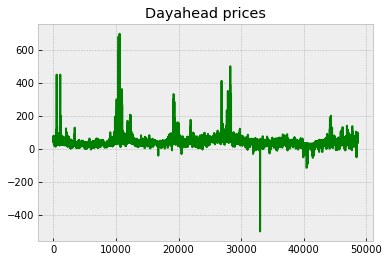

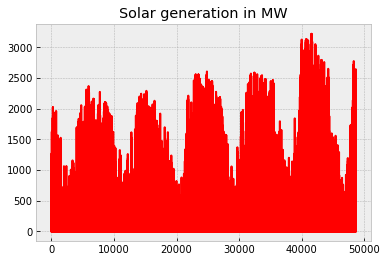

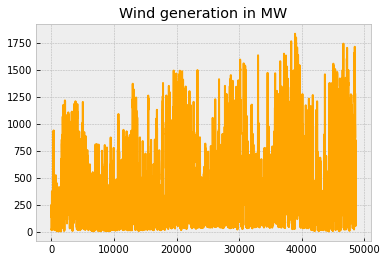

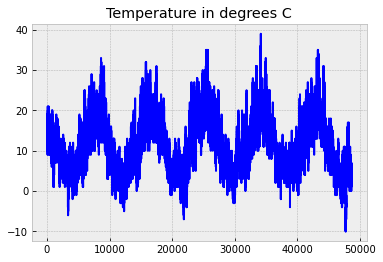

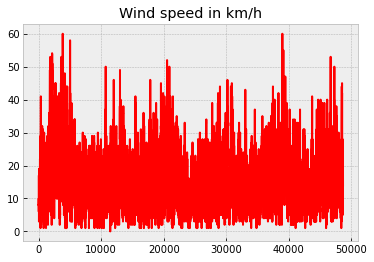

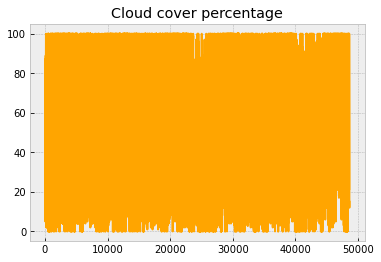

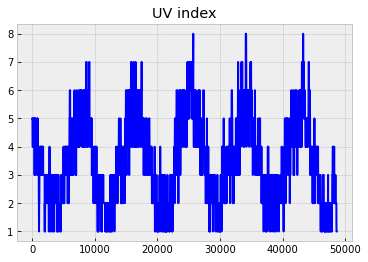

In [18]:
# Loading and plotting the data

dat = np.load("finaldata.npy")
print(dat.shape)

plt.title("Dayahead prices")
plt.plot((dat[:,1]).astype('float64'), color = "green")
plt.show()

plt.title("Solar generation in MW")
plt.plot((dat[:,2]).astype('float64'), color = "red")
plt.show()

plt.title("Wind generation in MW")
plt.plot((dat[:,3]).astype('float64'), color = "orange")
plt.show()

plt.title("Temperature in degrees C")
plt.plot((dat[:,4]).astype('float64'), color = "blue")
plt.show()

plt.title("Wind speed in km/h")
plt.plot((dat[:,5]).astype('float64'), color = "red")
plt.show()

plt.title("Cloud cover percentage")
plt.plot((dat[:,6]).astype('float64'), color = "orange")
plt.show()

plt.title("UV index")
plt.plot((dat[:,7]).astype('float64'), color = "blue")
plt.show()